In [1]:
import datetime

In [2]:
import sklearn
import pandas as pd
import numpy as np

In [3]:
from IPython.display import HTML

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


In [5]:
import holoviews as hv
%load_ext holoviews.ipython

In [6]:
%output holomap='widgets'

In [7]:
train = pd.read_csv('../data/train.csv', encoding="utf-8")

In [8]:
test = pd.read_csv('../data/test.csv', encoding="utf-8")

In [9]:
print(train)

      Id   Open Date            City  City Group Type  P1   P2   P3   P4  P5  \
0      0  07/17/1999        İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2   
1      1  02/14/2008          Ankara  Big Cities   FC   4  5.0  4.0  4.0   1   
2      2  03/09/2013      Diyarbakır       Other   IL   2  4.0  2.0  5.0   2   
3      3  02/02/2012           Tokat       Other   IL   6  4.5  6.0  6.0   4   
4      4  05/09/2009       Gaziantep       Other   IL   3  4.0  3.0  4.0   2   
5      5  02/12/2010          Ankara  Big Cities   FC   6  6.0  4.5  7.5   8   
6      6  10/11/2010        İstanbul  Big Cities   IL   2  3.0  4.0  4.0   1   
7      7  06/21/2011        İstanbul  Big Cities   IL   4  5.0  4.0  5.0   2   
8      8  08/28/2010  Afyonkarahisar       Other   IL   1  1.0  4.0  4.0   1   
9      9  11/16/2011          Edirne       Other   IL   6  4.5  6.0  7.5   6   
10    10  08/09/2013         Kocaeli       Other   FC   9  6.0  6.0  6.0   4   
11    11  05/22/2012        İstanbul  Bi

In [10]:
HTML(train[0:10].to_html())

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715
5,5,02/12/2010,Ankara,Big Cities,FC,6,6.0,4.5,7.5,8,10,10,8,8,8,10,8,6.0,0,0,0,0,0,5,6,3,1,5,0,0,0.0,0.0,7.5,5.0,0,0,0,0,0,0,0,0,5017319
6,6,10/11/2010,İstanbul,Big Cities,IL,2,3.0,4.0,4.0,1,5,5,5,5,5,2,5,5.0,3,4,4,3,4,2,4,1,2,1,5,4,4.0,5.0,1.0,3.0,4,5,2,2,3,5,4,4,5166635
7,7,06/21/2011,İstanbul,Big Cities,IL,4,5.0,4.0,5.0,2,3,5,4,4,4,4,3,4.0,0,0,0,0,0,3,5,2,4,2,0,0,0.0,0.0,3.0,2.0,0,0,0,0,0,0,0,0,4491607
8,8,08/28/2010,Afyonkarahisar,Other,IL,1,1.0,4.0,4.0,1,2,1,5,5,5,1,5,5.0,1,1,2,1,4,1,1,1,1,1,4,4,4.0,2.0,2.0,3.0,4,5,5,3,4,5,4,5,4952497
9,9,11/16/2011,Edirne,Other,IL,6,4.5,6.0,7.5,6,4,10,10,10,10,2,10,7.5,0,0,0,0,0,25,3,3,1,10,0,0,0.0,0.0,5.0,2.5,0,0,0,0,0,0,0,0,5444227


In [11]:
# Calculate the age of each sample, in days
end_dt = datetime.datetime.strptime('2015-1-1', "%Y-%m-%d")
train['Age'] = [(end_dt - datetime.datetime.strptime(open_dt, "%m/%d/%Y")).days for open_dt in train['Open Date']]
test['Age']  = [(end_dt - datetime.datetime.strptime(open_dt, "%m/%d/%Y")).days for open_dt in test['Open Date']]

In [12]:
train['isIL'] = train['Type']=='IL'
test['isIL'] = test['Type']=='IL'

In [13]:
train['isBig'] = train['City Group']=='Big Cities'
test['isBig'] = test['City Group']=='Big Cities'

In [14]:
# Need to use binary encoder or label encoder for the city names

In [15]:
train.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue', 'Age', 'isIL', 'isBig'], dtype='object')

In [16]:
test.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'Age', 'isIL', 'isBig'], dtype='object')

In [17]:
sum(test['Type']=='MB')

290

In [18]:
sum(test['Type']=='DT')

2244

In [19]:
2244/290

7.7379310344827585

In [20]:
sum(test['Type']=='IL')/len(test), sum(test['Type']=='FC')/len(test), sum(test['Type']=='DT')/len(test), sum(test['Type']=='MB')/len(test)

(0.40447, 0.57018999999999997, 0.022440000000000002, 0.0028999999999999998)

In [21]:
p = 0.003
p*0.5 + 0.5*(1-p)*p

0.0029955

In [22]:
li = test['Type']=='DT'

In [23]:
test_DT = test[li]

In [24]:
%matplotlib inline

In [25]:
len(np.unique(test_DT['Age'].values))

296

<Container object of 296 artists>

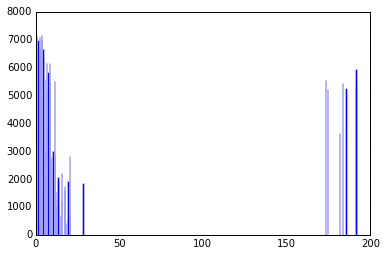

In [26]:
(x,b) = np.histogram(test_DT['Age'].values, 296)
plt.bar(x,b[:-1])

<Container object of 296 artists>

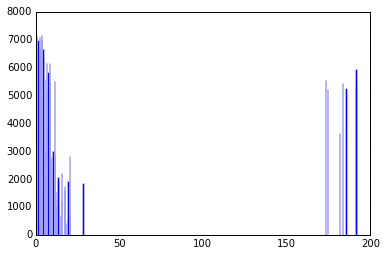

In [27]:
plt.bar(x,b[:-1])

In [28]:
def uniquehist(x, bins=None):
    if bins is not None:
        ux = bins
    else:
        ux = np.unique(x)
    count = np.zeros(len(ux),dtype=int)
    for ix,xx in enumerate(ux):
        count[ix] = np.sum(x==xx)
    return ux, count

In [29]:
ux, count = uniquehist(test_DT['Age'].values)

<Container object of 296 artists>

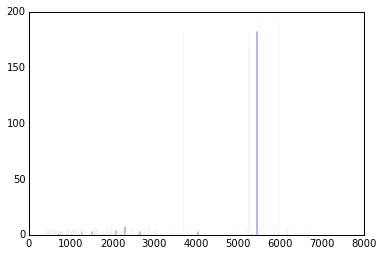

In [30]:
plt.bar(ux,count)

In [31]:
ux, count

(array([ 362,  380,  391,  394,  414,  419,  428,  433,  444,  448,  454,
         468,  479,  489,  496,  511,  512,  519,  535,  538,  540,  541,
         566,  573,  574,  582,  599,  605,  609,  610,  615,  622,  629,
         643,  645,  666,  673,  679,  709,  713,  716,  728,  733,  739,
         741,  751,  754,  758,  759,  770,  776,  778,  789,  795,  805,
         808,  819,  832,  881,  899,  903,  917,  921,  929,  940,  944,
         961,  972,  975,  978,  994, 1002, 1018, 1023, 1032, 1034, 1037,
        1050, 1065, 1066, 1071, 1077, 1080, 1097, 1098, 1100, 1105, 1131,
        1133, 1153, 1154, 1168, 1174, 1179, 1204, 1230, 1237, 1245, 1248,
        1258, 1263, 1266, 1277, 1287, 1291, 1324, 1363, 1372, 1385, 1388,
        1396, 1405, 1430, 1440, 1448, 1469, 1475, 1497, 1511, 1548, 1549,
        1556, 1575, 1576, 1577, 1581, 1583, 1604, 1613, 1614, 1624, 1639,
        1650, 1659, 1661, 1675, 1700, 1715, 1723, 1729, 1734, 1761, 1770,
        1777, 1780, 1781, 1787, 1842, 

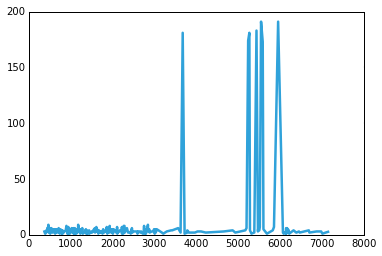

In [32]:
plt.plot(ux,count)

In [33]:
sum(count>50)

7

In [34]:
sum(test['Type']=='DT') + sum(test['Type']=='MB')

2534

In [35]:
len(test)

100000

In [36]:
len(test) / (sum(test['Type']=='DT') + sum(test['Type']=='MB')) * 8

315.70639305445934

# Clustering?

In [37]:
import sklearn.cluster

In [38]:
clst= sklearn.cluster.KMeans(316)

In [39]:
test.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'Age', 'isIL', 'isBig'], dtype='object')

In [40]:
cols = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
        'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
        'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30',
        'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'Age', 'isIL', 'isBig']

In [41]:
X = test[cols].as_matrix()

In [42]:
X.shape

(100000, 40)

In [43]:
X2 = X - X.min(0)
X2 = X2 / X.max(0)

In [44]:
C = clst.fit_predict(X2)

KeyboardInterrupt: 

In [ ]:
clst.n_clusters

In [47]:
clst.labels_

array([211,  13,  61, ..., 275, 201, 269], dtype=int32)

In [48]:
C

array([211,  13,  61, ..., 275, 201, 269], dtype=int32)

In [49]:
liC0 = C==0

In [50]:
test[liC0]

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P31,P32,P33,P34,P35,P36,P37,Age,isIL,isBig
60,60,08/03/2012,Trabzon,Other,FC,1,2.0,2,5.0,2,...,0,0,0,0,0,3,0,881,False,False
1055,1055,06/16/2012,Bolu,Other,FC,2,2.0,0,5.0,2,...,0,5,0,0,0,0,0,929,False,False
2146,2146,05/01/2010,Kocaeli,Other,FC,1,2.0,0,5.0,2,...,0,0,0,0,0,0,0,1706,False,False
4880,4880,06/16/2012,Erzincan,Other,FC,3,2.0,0,4.0,3,...,0,0,0,0,0,0,0,929,False,False
6032,6032,06/16/2012,Bursa,Other,FC,1,1.5,0,5.0,3,...,0,0,0,0,0,0,0,929,False,False
6052,6052,06/16/2012,Zonguldak,Other,FC,1,2.0,0,5.0,3,...,0,0,0,0,0,0,0,929,False,False
7198,7198,11/21/2009,Mardin,Other,FC,1,2.0,0,5.0,2,...,0,0,0,0,0,4,0,1867,False,False
7578,7578,06/16/2012,Bursa,Other,FC,12,2.0,0,4.5,3,...,0,0,0,0,0,0,0,929,False,False
8346,8346,06/16/2012,Adana,Other,FC,1,2.0,0,5.0,3,...,0,0,0,0,0,0,0,929,False,False
8879,8879,12/17/2006,Mardin,Other,FC,3,5.0,0,5.0,3,...,0,0,0,0,0,0,0,2937,False,False


In [ ]:
clst2 = sklearn.cluster.DBSCAN()

In [ ]:
C2 = clst2.fit_predict(X)

In [ ]:
clst2.components_.shape

In [ ]:
len(np.unique(C2))

In [ ]:
import sklearn.metrics.pairwise

In [ ]:
help(sklearn.metrics.pairwise)

In [ ]:
import time

In [ ]:
X_dist = np.zeros((X.shape[0],X.shape[0]),dtype=np.uint8)
start_time = time.time()
for i in range(X.shape[0]):
    X_dist[:,i] = np.sum(X == np.expand_dims(X[i,:],0), 1)
    if i%1000==0:
        print(i, time.time()-start_time)

This will work, but I don't have time now. Not sure if I have enough diskspace to save it to my laptop, either.

# Age-driven selection

For the time being, just find any datapoint which is real (non-pseudo) so we can investigate whether it is in the public set

In [43]:
allcols = cols
uhistdict = {}
for col in allcols:
    x,y = uniquehist(test[col].values)
    uhistdict[col] = (x,y/sum(y))

In [44]:
uhistdict

{'Age': (array([ 362,  380,  391,  394,  414,  419,  428,  433,  444,  446,  448,
          454,  468,  479,  489,  496,  511,  512,  519,  535,  538,  540,
          541,  566,  573,  574,  582,  599,  605,  608,  609,  610,  615,
          622,  629,  643,  645,  666,  673,  679,  709,  713,  716,  728,
          733,  739,  741,  751,  754,  758,  759,  770,  776,  778,  789,
          795,  805,  808,  819,  832,  866,  881,  899,  903,  917,  921,
          929,  940,  944,  961,  972,  975,  978,  994, 1002, 1018, 1023,
         1032, 1034, 1037, 1050, 1065, 1066, 1071, 1077, 1080, 1097, 1098,
         1100, 1105, 1116, 1131, 1133, 1153, 1154, 1168, 1174, 1179, 1204,
         1230, 1237, 1245, 1248, 1258, 1263, 1266, 1277, 1287, 1291, 1324,
         1363, 1372, 1385, 1388, 1396, 1405, 1430, 1440, 1448, 1455, 1465,
         1469, 1475, 1476, 1497, 1511, 1543, 1548, 1549, 1556, 1575, 1576,
         1577, 1581, 1583, 1604, 1613, 1614, 1616, 1624, 1639, 1650, 1659,
         1661, 167

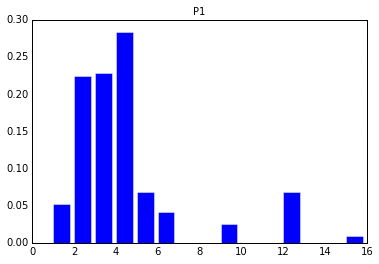

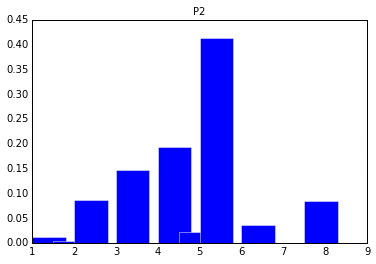

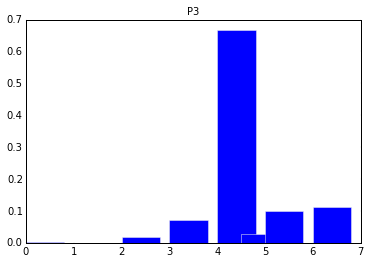

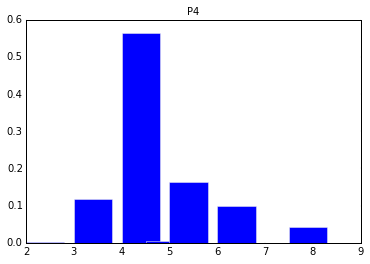

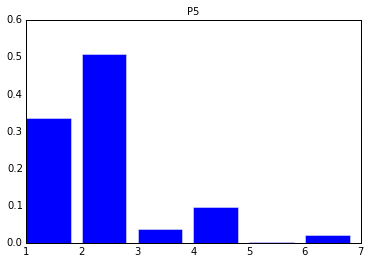

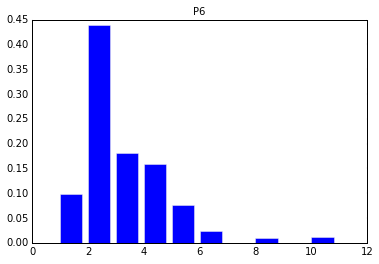

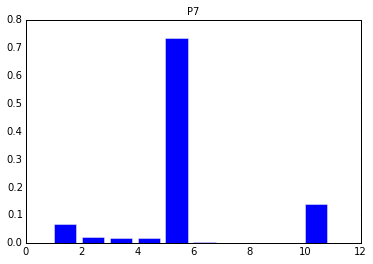

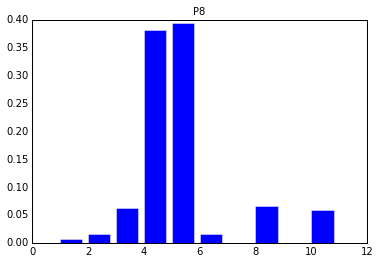

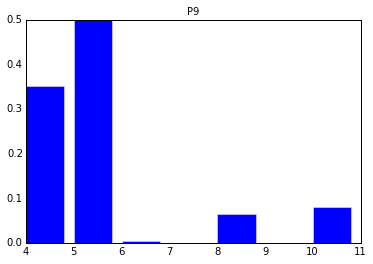

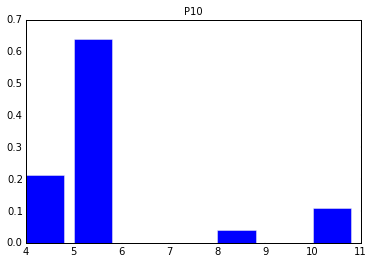

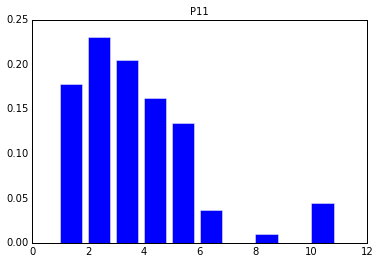

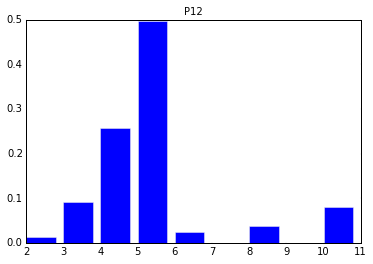

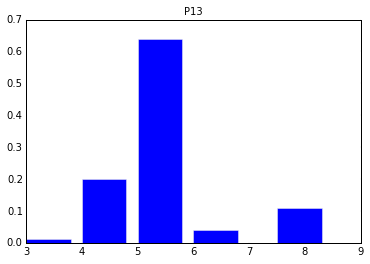

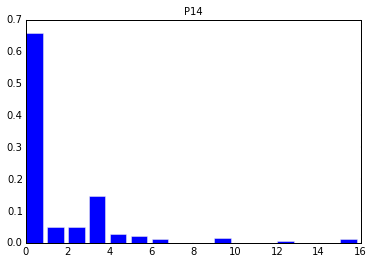

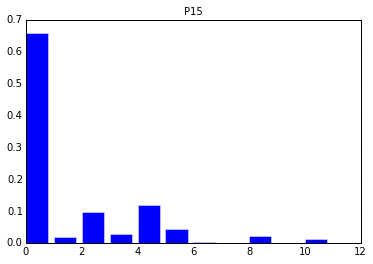

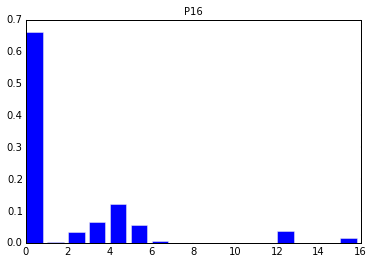

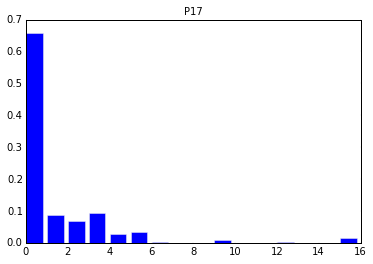

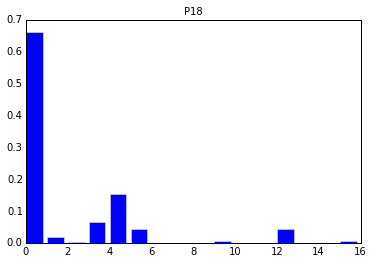

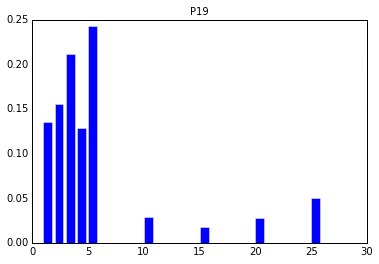

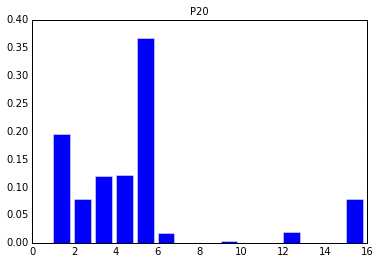

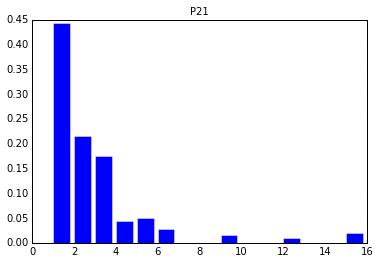

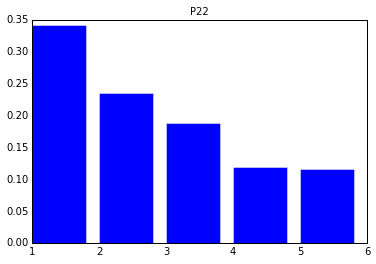

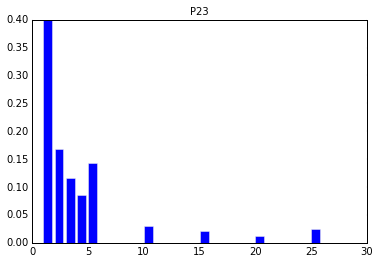

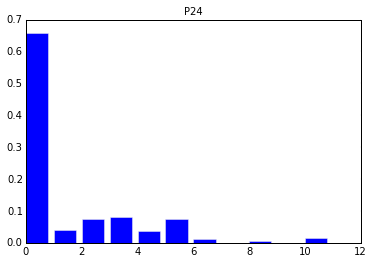

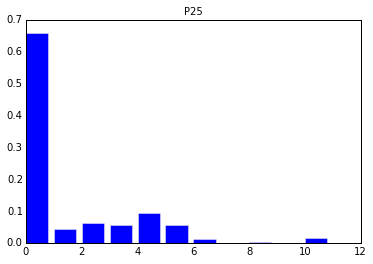

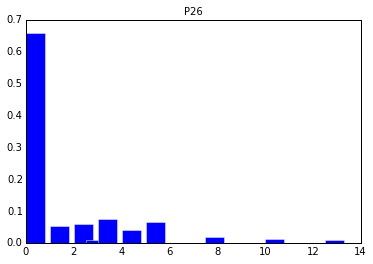

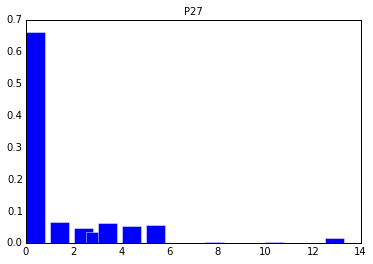

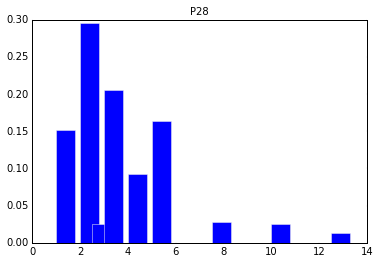

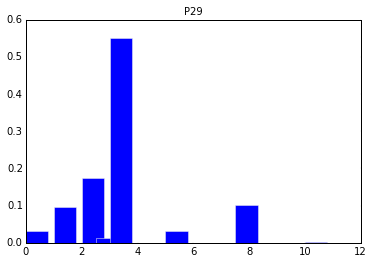

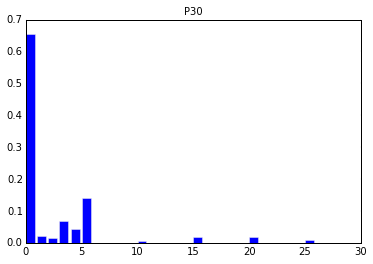

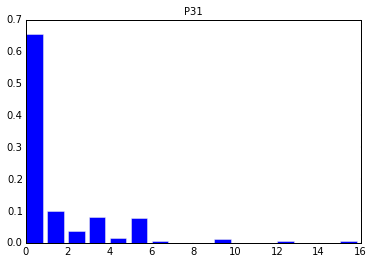

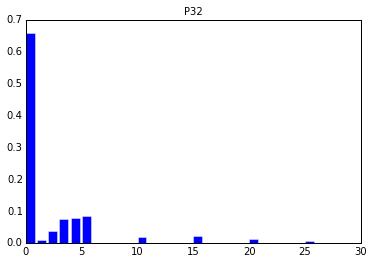

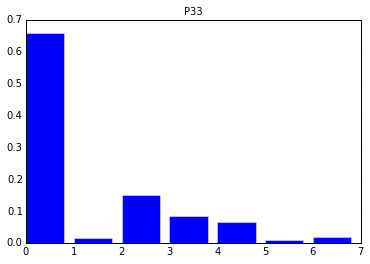

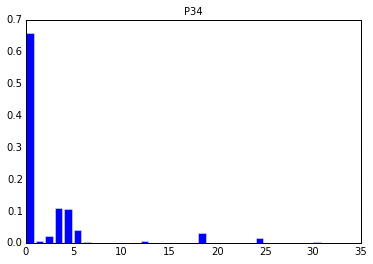

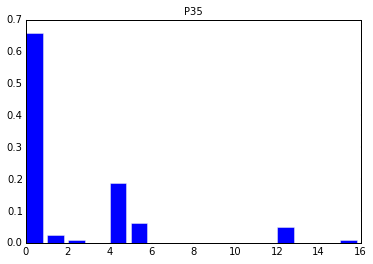

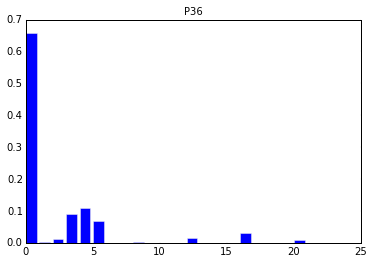

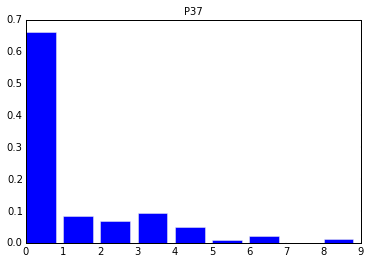

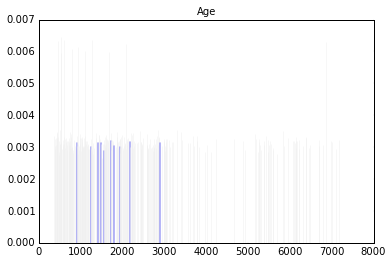

/usr/local/lib/python3.4/dist-packages/matplotlib/transforms.py:1883: DeprecationWarning: numpy boolean negative (the unary `-` operator) is deprecated, use the bitwise_xor (the `^` operator) or the logical_xor function instead.
  return self.translate(-x, -y).rotate_deg(degrees).translate(x, y)
/usr/local/lib/python3.4/dist-packages/matplotlib/transforms.py:1883: DeprecationWarning: numpy boolean negative (the unary `-` operator) is deprecated, use the bitwise_xor (the `^` operator) or the logical_xor function instead.
  return self.translate(-x, -y).rotate_deg(degrees).translate(x, y)
/usr/local/lib/python3.4/dist-packages/matplotlib/transforms.py:1883: DeprecationWarning: numpy boolean negative (the unary `-` operator) is deprecated, use the bitwise_xor (the `^` operator) or the logical_xor function instead.
  return self.translate(-x, -y).rotate_deg(degrees).translate(x, y)
/usr/local/lib/python3.4/dist-packages/matplotlib/transforms.py:1883: DeprecationWarning: numpy boolean negat

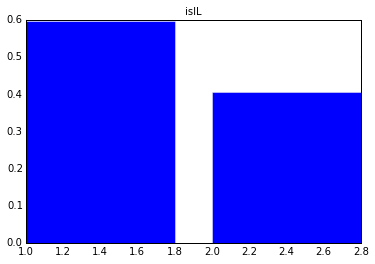

/usr/local/lib/python3.4/dist-packages/matplotlib/transforms.py:1883: DeprecationWarning: numpy boolean negative (the unary `-` operator) is deprecated, use the bitwise_xor (the `^` operator) or the logical_xor function instead.
  return self.translate(-x, -y).rotate_deg(degrees).translate(x, y)
/usr/local/lib/python3.4/dist-packages/matplotlib/transforms.py:1883: DeprecationWarning: numpy boolean negative (the unary `-` operator) is deprecated, use the bitwise_xor (the `^` operator) or the logical_xor function instead.
  return self.translate(-x, -y).rotate_deg(degrees).translate(x, y)
/usr/local/lib/python3.4/dist-packages/matplotlib/transforms.py:1883: DeprecationWarning: numpy boolean negative (the unary `-` operator) is deprecated, use the bitwise_xor (the `^` operator) or the logical_xor function instead.
  return self.translate(-x, -y).rotate_deg(degrees).translate(x, y)
/usr/local/lib/python3.4/dist-packages/matplotlib/transforms.py:1883: DeprecationWarning: numpy boolean negat

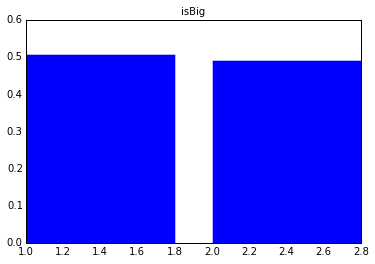

In [45]:
for col in cols:
    plt.bar(uhistdict[col][0],uhistdict[col][1])
    plt.title(col)
    plt.show()

In [46]:
expected_age_count = np.median(uhistdict['Age'][1])
li = uhistdict['Age'][1] > expected_age_count*1.5
print(uhistdict['Age'][0][li])
print(uhistdict['Age'][1][li])

[ 468  538  540  605  805  944 1100 1277 1675 2085 6876]
[ 0.00632  0.00594  0.00645  0.00635  0.00607  0.00615  0.00601  0.00635
  0.00597  0.00625  0.00631]


In [101]:
n_true = len(uhistdict['Age'][0]) + sum(li)
print('Number of true examples is ', n_true)
print('Number of public examples is ', n_true*0.3)

Number of true examples is  321
Number of public examples is  96.3


In [47]:
import pickle

In [48]:
genuinetestmap = pickle.load(open('../data/genuinetestmap.pkl', 'rb'))

In [49]:
genuinetestmap

OrderedDict([(362, array([2679, 6347])), (380, array([84446])), (391, array([29949, 64895, 83582])), (394, array([ 2134, 13062, 36251, 70575, 86590, 95607])), (414, array([20626])), (419, array([34091, 68712])), (428, array([38773, 63722, 69299])), (433, array([13389, 15600, 25952, 47279])), (444, array([ 4549, 17429])), (446, array([41573, 70596])), (448, array([17314, 26154, 67813, 95786])), (454, array([51130, 57160])), (468, None), (479, array([60043])), (489, array([43710, 53479])), (496, array([28435])), (511, array([59684])), (512, array([85087, 92221])), (519, array([70377, 94200, 99162])), (535, array([ 9601, 38888, 65109, 73136])), (538, None), (540, None), (541, array([22417])), (566, array([ 4899,  5781, 93371])), (573, array([ 4158, 21241, 29049, 34654, 35718, 43038, 51774, 85172, 90133, 97173])), (574, array([ 3799, 12644, 15193, 24481, 71153, 90152])), (582, array([ 1218, 12242, 40120, 53774, 67030, 69486, 77983, 86810, 91126])), (599, array([30045])), (605, None), (608,

In [50]:
group0 = test[C==0]

NameError: name 'C' is not defined

In [ ]:
group_centre = group0[cols][0:1]
group_centre['Id'] = -1
for col in cols:
    x,y = uniquehist(group0[col].values, uhistdict[col][0])
    y = y/sum(y)
    print(np.vstack((y, uhistdict[col][1])))
    idx = np.argmax(y - uhistdict[col][1])
    group_centre[col] = uhistdict[col][0][idx]

In [ ]:
HTML(group_centre.to_html())

In [ ]:
group0.as_matrix().shape

In [ ]:
li_centre = np.ones(len(group0))
for col in cols:
    li_centre = li_centre * (group0[col].values == group_centre[col].values)

In [ ]:
sum(li_centre)

In [ ]:
for iGroup in np.unique(C):
    group = test[C==iGroup]
    group_centre = group[cols][0:1]
    group_centre['Id'] = -1
    for col in cols:
        x,y = uniquehist(group[col].values, uhistdict[col][0])
        y = y/sum(y)
        idx = np.argmax(y - uhistdict[col][1])
        group_centre[col] = uhistdict[col][0][idx]
    li_centre = np.ones(len(group),dtype=bool)
    for col in cols:
        li_centre = li_centre * (group[col].values == group_centre[col].values)
    print(iGroup, sum(li_centre))

In [51]:
uhistdict

{'Age': (array([ 362,  380,  391,  394,  414,  419,  428,  433,  444,  446,  448,
          454,  468,  479,  489,  496,  511,  512,  519,  535,  538,  540,
          541,  566,  573,  574,  582,  599,  605,  608,  609,  610,  615,
          622,  629,  643,  645,  666,  673,  679,  709,  713,  716,  728,
          733,  739,  741,  751,  754,  758,  759,  770,  776,  778,  789,
          795,  805,  808,  819,  832,  866,  881,  899,  903,  917,  921,
          929,  940,  944,  961,  972,  975,  978,  994, 1002, 1018, 1023,
         1032, 1034, 1037, 1050, 1065, 1066, 1071, 1077, 1080, 1097, 1098,
         1100, 1105, 1116, 1131, 1133, 1153, 1154, 1168, 1174, 1179, 1204,
         1230, 1237, 1245, 1248, 1258, 1263, 1266, 1277, 1287, 1291, 1324,
         1363, 1372, 1385, 1388, 1396, 1405, 1430, 1440, 1448, 1455, 1465,
         1469, 1475, 1476, 1497, 1511, 1543, 1548, 1549, 1556, 1575, 1576,
         1577, 1581, 1583, 1604, 1613, 1614, 1616, 1624, 1639, 1650, 1659,
         1661, 167

In [52]:
smallest_value = (None,None,1.0)
for col in cols:
    idx = np.argmin(uhistdict[col][1])
    print(col,uhistdict[col][0][idx],uhistdict[col][1][idx])
    if uhistdict[col][1][idx] < smallest_value[2]:
        smallest_value = (col,uhistdict[col][0][idx],uhistdict[col][1][idx])

P1 15 0.00897
P2 1.5 0.00318
P3 0.0 0.00318
P4 2.0 0.00311
P5 5 0.00287
P6 8 0.00921
P7 6 0.00292
P8 1 0.00639
P9 6 0.00307
P10 8 0.04054
P11 8 0.00958
P12 2 0.01275
P13 3.0 0.01247
P14 12 0.006
P15 6 0.00304
P16 1 0.00315
P17 6 0.00307
P18 2 0.00322
P19 15 0.01821
P20 9 0.00322
P21 12 0.00936
P22 5 0.11537
P23 20 0.01231
P24 8 0.006
P25 8 0.00301
P26 12.5 0.00917
P27 10.0 0.00306
P28 12.5 0.01274
P29 10.0 0.00304
P30 10 0.00586
P31 6 0.00585
P32 25 0.00606
P33 5 0.01027
P34 6 0.00301
P35 2 0.0091
P36 8 0.00293
P37 5 0.0088
Age 739 0.00265
isIL True 0.40447
isBig True 0.49272


In [53]:
smallest_value

('Age', 739, 0.00265)

In [54]:
smallest_value[2]*100000

265.0

In [55]:
len(uhistdict['Age'][0])

310

In [56]:
li_ = test['Age'].values==739

In [57]:
test[li_]

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P31,P32,P33,P34,P35,P36,P37,Age,isIL,isBig
250,250,12/23/2012,İstanbul,Big Cities,IL,2,2.0,3.0,5.0,2,...,3,10,0,0,0,0,0,739,True,True
411,411,12/23/2012,Ankara,Big Cities,IL,4,5.0,4.0,4.0,2,...,1,3,3,3,4,0,3,739,True,True
593,593,12/23/2012,Trabzon,Other,IL,2,5.0,3.0,5.0,2,...,0,0,0,0,0,0,0,739,True,False
649,649,12/23/2012,Mardin,Other,FC,2,7.5,6.0,6.0,4,...,0,0,0,0,0,0,0,739,False,False
1674,1674,12/23/2012,İstanbul,Big Cities,IL,2,5.0,6.0,5.0,2,...,1,0,0,0,0,0,0,739,True,True
2244,2244,12/23/2012,Mardin,Other,IL,2,2.0,3.0,5.0,2,...,0,0,0,0,0,0,0,739,True,False
2548,2548,12/23/2012,İstanbul,Big Cities,FC,3,5.0,3.0,4.0,2,...,0,0,0,0,0,5,0,739,False,True
3084,3084,12/23/2012,Mardin,Other,IL,2,2.0,3.0,5.0,2,...,0,0,0,0,0,0,0,739,True,False
3113,3113,12/23/2012,Antalya,Other,IL,1,1.0,4.0,5.0,2,...,5,5,3,0,0,4,4,739,True,False
3744,3744,12/23/2012,Mardin,Other,IL,4,5.0,3.0,4.0,1,...,0,0,0,0,0,0,0,739,True,False


In [58]:
allcols = test.columns
uhistdict = {}
for col in allcols:
    x,y = uniquehist(test[col].values)
    uhistdict[col] = (x,y/sum(y))

In [59]:
li_ = test['Age'].values==739
group = test[li_]
group_centre = {}
for col in test.columns:
    if col=='Id':
        continue
    x,y = uniquehist(group[col].values, uhistdict[col][0])
    y = y/sum(y)
    idx = np.argmax(y - uhistdict[col][1])
    group_centre[col] = uhistdict[col][0][idx]
li_centre = np.ones(len(group),dtype=bool)
for col in test.columns:
    if col=='Id':
        continue
    li_centre = li_centre * (group[col].values == group_centre[col])
print(sum(li_centre))

2


In [60]:
HTML(group[li_centre].to_html())

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,Age,isIL,isBig
2244,2244,12/23/2012,Mardin,Other,IL,2,2,3,5,2,1,4,4,4,4,3,4,4,0,0,0,0,0,3,4,1,1,2,0,0,0,0,2,3,0,0,0,0,0,0,0,0,739,True,False
90048,90048,12/23/2012,Mardin,Other,IL,2,2,3,5,2,1,4,4,4,4,3,4,4,0,0,0,0,0,3,4,1,1,2,0,0,0,0,2,3,0,0,0,0,0,0,0,0,739,True,False


In [61]:
group_centre

{'Age': 739,
 'City': 'Mardin',
 'City Group': 'Other',
 'Open Date': '12/23/2012',
 'P1': 2,
 'P10': 4,
 'P11': 3,
 'P12': 4,
 'P13': 4.0,
 'P14': 0,
 'P15': 0,
 'P16': 0,
 'P17': 0,
 'P18': 0,
 'P19': 3,
 'P2': 2.0,
 'P20': 4,
 'P21': 1,
 'P22': 1,
 'P23': 2,
 'P24': 0,
 'P25': 0,
 'P26': 0.0,
 'P27': 0.0,
 'P28': 2.0,
 'P29': 3.0,
 'P3': 3.0,
 'P30': 0,
 'P31': 0,
 'P32': 0,
 'P33': 0,
 'P34': 0,
 'P35': 0,
 'P36': 0,
 'P37': 0,
 'P4': 5.0,
 'P5': 2,
 'P6': 1,
 'P7': 4,
 'P8': 4,
 'P9': 4,
 'Type': 'IL',
 'isBig': False,
 'isIL': True}

In [62]:
li_ = test['Age'].values==362
group = test[li_]
group_centre = {}
for col in test.columns:
    if col=='Id':
        continue
    x,y = uniquehist(group[col].values, uhistdict[col][0])
    y = y/sum(y)
    idx = np.argmax(y - uhistdict[col][1])
    group_centre[col] = uhistdict[col][0][idx]
li_centre = np.ones(len(group),dtype=bool)
for col in test.columns:
    if col=='Id':
        continue
    li_centre = li_centre * (group[col].values == group_centre[col])
print(sum(li_centre))
print(group[li_centre])

2
        Id   Open Date   City City Group Type  P1  P2  P3  P4  P5  ...    P31  \
2679  2679  01/04/2014  Adana      Other   IL   4   5   4   4   1  ...      0   
6347  6347  01/04/2014  Adana      Other   IL   4   5   4   4   1  ...      0   

      P32  P33  P34  P35  P36  P37  Age  isIL  isBig  
2679    0    0    0    0    0    0  362  True  False  
6347    0    0    0    0    0    0  362  True  False  

[2 rows x 45 columns]


In [63]:
li_ = test['Age'].values==7178
group = test[li_]
group_centre = {}
for col in test.columns:
    if col=='Id':
        continue
    x,y = uniquehist(group[col].values, uhistdict[col][0])
    y = y/sum(y)
    idx = np.argmax(y - uhistdict[col][1])
    group_centre[col] = uhistdict[col][0][idx]
li_centre = np.ones(len(group),dtype=bool)
for col in test.columns:
    if col=='Id':
        continue
    li_centre = li_centre * (group[col].values == group_centre[col])
print(sum(li_centre))
print(group[li_centre])

3
          Id   Open Date      City  City Group Type  P1  P2  P3  P4  P5  \
6212    6212  05/08/1995  İstanbul  Big Cities   IL   4   5   5   3   1   
17479  17479  05/08/1995  İstanbul  Big Cities   IL   4   5   5   3   1   
47342  47342  05/08/1995  İstanbul  Big Cities   IL   4   5   5   3   1   

       ...    P31  P32  P33  P34  P35  P36  P37   Age  isIL  isBig  
6212   ...      1    2    1    1    5    3    1  7178  True   True  
17479  ...      1    2    1    1    5    3    1  7178  True   True  
47342  ...      1    2    1    1    5    3    1  7178  True   True  

[3 rows x 45 columns]


In [64]:
li_ = test['Age'].values==380
group = test[li_]
group_centre = {}
for col in test.columns:
    if col=='Id':
        continue
    x,y = uniquehist(group[col].values, uhistdict[col][0])
    y = y/sum(y)
    idx = np.argmax(y - uhistdict[col][1])
    group_centre[col] = uhistdict[col][0][idx]
li_centre = np.ones(len(group),dtype=bool)
for col in test.columns:
    if col=='Id':
        continue
    li_centre = li_centre * (group[col].values == group_centre[col])
print(sum(li_centre))
print(group[li_centre])

1
          Id   Open Date    City City Group Type  P1  P2  P3  P4  P5  ...    \
84446  84446  12/17/2013  Batman      Other   FC   3   4   2   4   2  ...     

       P31  P32  P33  P34  P35  P36  P37  Age   isIL  isBig  
84446    0    0    0    0    0    0    0  380  False  False  

[1 rows x 45 columns]


In [65]:
li_ = test['Age'].values==391
group = test[li_]
group_centre = {}
for col in test.columns:
    if col=='Id':
        continue
    x,y = uniquehist(group[col].values, uhistdict[col][0])
    y = y/sum(y)
    idx = np.argmax(y - uhistdict[col][1])
    group_centre[col] = uhistdict[col][0][idx]
li_centre = np.ones(len(group),dtype=bool)
for col in test.columns:
    if col=='Id':
        continue
    li_centre = li_centre * (group[col].values == group_centre[col])
print(sum(li_centre))
print(group[li_centre])

3
          Id   Open Date    City City Group Type  P1  P2  P3  P4  P5  ...    \
29949  29949  12/06/2013  Mersin      Other   IL   2   3   4   4   1  ...     
64895  64895  12/06/2013  Mersin      Other   IL   2   3   4   4   1  ...     
83582  83582  12/06/2013  Mersin      Other   IL   2   3   4   4   1  ...     

       P31  P32  P33  P34  P35  P36  P37  Age  isIL  isBig  
29949    0    0    0    0    0    0    0  391  True  False  
64895    0    0    0    0    0    0    0  391  True  False  
83582    0    0    0    0    0    0    0  391  True  False  

[3 rows x 45 columns]


In [66]:
li_ = test['Age'].values==7092
group = test[li_]
group_centre = {}
for col in test.columns:
    if col=='Id':
        continue
    x,y = uniquehist(group[col].values, uhistdict[col][0])
    y = y/sum(y)
    idx = np.argmax(y - uhistdict[col][1])
    group_centre[col] = uhistdict[col][0][idx]
li_centre = np.ones(len(group),dtype=bool)
for col in test.columns:
    if col=='Id':
        continue
    li_centre = li_centre * (group[col].values == group_centre[col])
print(sum(li_centre))
print(group[li_centre])

6
          Id   Open Date      City  City Group Type  P1  P2  P3  P4  P5  \
11153  11153  08/02/1995  İstanbul  Big Cities   IL   3   5   4   5   2   
62370  62370  08/02/1995  İstanbul  Big Cities   IL   3   5   4   5   2   
74757  74757  08/02/1995  İstanbul  Big Cities   IL   3   5   4   5   2   
75865  75865  08/02/1995  İstanbul  Big Cities   IL   3   5   4   5   2   
89385  89385  08/02/1995  İstanbul  Big Cities   IL   3   5   4   5   2   
99604  99604  08/02/1995  İstanbul  Big Cities   IL   3   5   4   5   2   

       ...    P31  P32  P33  P34  P35  P36  P37   Age  isIL  isBig  
11153  ...      1    5    2    4    4    4    2  7092  True   True  
62370  ...      1    5    2    4    4    4    2  7092  True   True  
74757  ...      1    5    2    4    4    4    2  7092  True   True  
75865  ...      1    5    2    4    4    4    2  7092  True   True  
89385  ...      1    5    2    4    4    4    2  7092  True   True  
99604  ...      1    5    2    4    4    4    2  7092  Tru

In [67]:
ccols = ['P14','P15','P16','P17','P18','P24','P25','P26','P27','P30','P31','P32','P33','P34','P35','P36','P37']
#T = test.as_matrix(columns=ccols)
#T_xor = np.any(np.concatenate((np.expand_dims(np.all(T==0,1),1), np.expand_dims(np.all(T!=0,1),1)),1),1)

In [68]:
li_ = test['Age'].values==394
group = test[li_]
group_centre = {}
for col in test.columns:
    if col=='Id':
        continue
    x,y = uniquehist(group[col].values, uhistdict[col][0])
    y = y/sum(y)
    idx = np.argmax(y - uhistdict[col][1])
    group_centre[col] = uhistdict[col][0][idx]
li_centre = np.ones(len(group),dtype=bool)
for col in test.columns:
    if col=='Id':
        continue
    li_centre = li_centre * (group[col].values == group_centre[col])
print(sum(li_centre))
print(group[li_centre])
T = group[li_centre][0:1][ccols].as_matrix()
T_xor = np.any(np.concatenate((np.expand_dims(np.all(T==0,1),1), np.expand_dims(np.all(T!=0,1),1)),1),1)
print(T_xor)
print(group[li_centre]['Id'].values)

6
          Id   Open Date      City  City Group Type  P1  P2  P3  P4  P5  \
2134    2134  12/03/2013  İstanbul  Big Cities   FC   4   5   4   5   2   
13062  13062  12/03/2013  İstanbul  Big Cities   FC   4   5   4   5   2   
36251  36251  12/03/2013  İstanbul  Big Cities   FC   4   5   4   5   2   
70575  70575  12/03/2013  İstanbul  Big Cities   FC   4   5   4   5   2   
86590  86590  12/03/2013  İstanbul  Big Cities   FC   4   5   4   5   2   
95607  95607  12/03/2013  İstanbul  Big Cities   FC   4   5   4   5   2   

       ...    P31  P32  P33  P34  P35  P36  P37  Age   isIL  isBig  
2134   ...      0    0    0    0    0    0    0  394  False   True  
13062  ...      0    0    0    0    0    0    0  394  False   True  
36251  ...      0    0    0    0    0    0    0  394  False   True  
70575  ...      0    0    0    0    0    0    0  394  False   True  
86590  ...      0    0    0    0    0    0    0  394  False   True  
95607  ...      0    0    0    0    0    0    0  394  Fals

In [69]:
li_ = test['Age'].values==7016
group = test[li_]
group_centre = {}
for col in test.columns:
    if col=='Id':
        continue
    x,y = uniquehist(group[col].values, uhistdict[col][0])
    y = y/sum(y)
    idx = np.argmax(y - uhistdict[col][1])
    group_centre[col] = uhistdict[col][0][idx]
li_centre = np.ones(len(group),dtype=bool)
for col in test.columns:
    if col=='Id':
        continue
    li_centre = li_centre * (group[col].values == group_centre[col])
print(sum(li_centre))
print(group[li_centre])
T = group[li_centre][0:1][ccols].as_matrix()
T_xor = np.any(np.concatenate((np.expand_dims(np.all(T==0,1),1), np.expand_dims(np.all(T!=0,1),1)),1),1)
print(T_xor)
print(group[li_centre]['Id'].values)

5
          Id   Open Date      City  City Group Type  P1  P2  P3  P4  P5  \
2141    2141  10/17/1995  İstanbul  Big Cities   IL   4   5   4   5   1   
41852  41852  10/17/1995  İstanbul  Big Cities   IL   4   5   4   5   1   
64628  64628  10/17/1995  İstanbul  Big Cities   IL   4   5   4   5   1   
67454  67454  10/17/1995  İstanbul  Big Cities   IL   4   5   4   5   1   
94768  94768  10/17/1995  İstanbul  Big Cities   IL   4   5   4   5   1   

       ...    P31  P32  P33  P34  P35  P36  P37   Age  isIL  isBig  
2141   ...      1    4    2    3    2    4    2  7016  True   True  
41852  ...      1    4    2    3    2    4    2  7016  True   True  
64628  ...      1    4    2    3    2    4    2  7016  True   True  
67454  ...      1    4    2    3    2    4    2  7016  True   True  
94768  ...      1    4    2    3    2    4    2  7016  True   True  

[5 rows x 45 columns]
[ True]
[ 2141 41852 64628 67454 94768]


In [70]:
li_ = test['Age'].values==1556
group = test[li_]
group_centre = {}
for col in test.columns:
    if col=='Id':
        continue
    x,y = uniquehist(group[col].values, uhistdict[col][0])
    y = y/sum(y)
    idx = np.argmax(y - uhistdict[col][1])
    group_centre[col] = uhistdict[col][0][idx]
li_centre = np.ones(len(group),dtype=bool)
for col in test.columns:
    if col=='Id':
        continue
    li_centre = li_centre * (group[col].values == group_centre[col])
print(sum(li_centre))
print(group[li_centre])
T = group[li_centre][0:1][ccols].as_matrix()
T_xor = np.any(np.concatenate((np.expand_dims(np.all(T==0,1),1), np.expand_dims(np.all(T!=0,1),1)),1),1)
print(T_xor)
print(group[li_centre]['Id'].values)

1
        Id   Open Date   City City Group Type  P1  P2  P3  P4  P5  ...    P31  \
1746  1746  09/28/2010  Bursa      Other   FC   2   3   3   4   2  ...      0   

      P32  P33  P34  P35  P36  P37   Age   isIL  isBig  
1746    0    0    0    0    0    0  1556  False  False  

[1 rows x 45 columns]
[ True]
[1746]


### See if we can manually cluster the ones which didn't work with automated method

In [89]:
missing_cluster_ages = [a for a in genuinetestmap.keys() if genuinetestmap[a] is None]

In [90]:
missing_cluster_ages

[468, 538, 540, 605, 754, 805, 944, 1100, 1277, 1675, 2085, 3426, 6876]

In [93]:
li_ = test['Age'].values==missing_cluster_ages[0]
group = test[li_]
group_centre = {}
for col in test.columns:
    if col=='Id':
        continue
    x,y = uniquehist(group[col].values, uhistdict[col][0])
    y = y/sum(y)
    idx = np.argmax(y - uhistdict[col][1])
    group_centre[col] = uhistdict[col][0][idx]
li_centre = np.ones(len(group),dtype=bool)
for col in test.columns:
    if col=='Id':
        continue
    li_centre = li_centre * (group[col].values == group_centre[col])
print(sum(li_centre))
print(group[li_centre])
T = group[li_centre][0:1][ccols].as_matrix()
T_xor = np.any(np.concatenate((np.expand_dims(np.all(T==0,1),1), np.expand_dims(np.all(T!=0,1),1)),1),1)
print(T_xor)
print(group[li_centre]['Id'].values)

0
Empty DataFrame
Columns: [Id, Open Date, City, City Group, Type, P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11, P12, P13, P14, P15, P16, P17, P18, P19, P20, P21, P22, P23, P24, P25, P26, P27, P28, P29, P30, P31, P32, P33, P34, P35, P36, P37, Age, isIL, isBig]
Index: []

[0 rows x 45 columns]
[]
[]


In [94]:
li_ = test['Age'].values==missing_cluster_ages[0]
test[li_]

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P31,P32,P33,P34,P35,P36,P37,Age,isIL,isBig
34,34,09/20/2013,Gaziantep,Other,FC,3,5.0,3.0,4.0,1,...,0,0,0,5,0,0,2,468,False,False
167,167,09/20/2013,Ankara,Big Cities,FC,3,5.0,4.0,3.0,2,...,0,0,0,0,0,0,0,468,False,True
604,604,09/20/2013,İstanbul,Big Cities,FC,4,2.0,3.0,4.0,2,...,0,0,0,0,0,0,0,468,False,True
635,635,09/20/2013,Kocaeli,Other,FC,12,7.5,6.0,6.0,4,...,0,0,0,0,0,0,0,468,False,False
1065,1065,09/20/2013,İstanbul,Big Cities,DT,3,3.0,3.0,7.5,1,...,0,0,0,0,0,0,0,468,False,True
1355,1355,09/20/2013,İstanbul,Big Cities,FC,3,5.0,3.0,4.0,2,...,0,0,0,0,0,0,0,468,False,True
1525,1525,09/20/2013,Kocaeli,Other,FC,3,5.0,4.0,4.0,3,...,0,0,0,0,0,0,0,468,False,False
1792,1792,09/20/2013,Gaziantep,Other,FC,4,7.5,4.0,6.0,3,...,0,0,0,0,0,0,0,468,False,False
1796,1796,09/20/2013,Ankara,Big Cities,FC,3,5.0,3.0,4.0,2,...,0,0,0,0,0,0,0,468,False,True
1910,1910,09/20/2013,Manisa,Other,FC,3,5.0,4.0,4.0,2,...,1,0,0,5,0,5,3,468,False,False


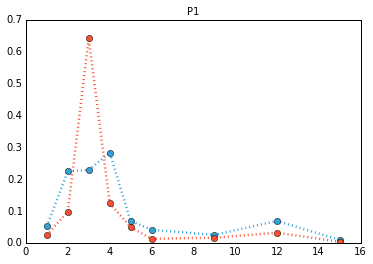

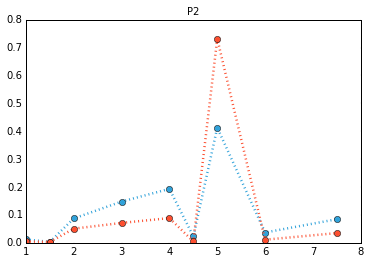

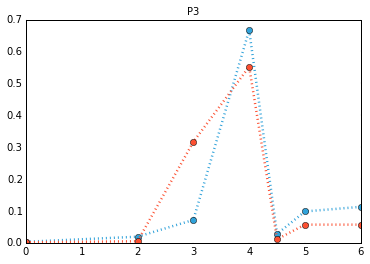

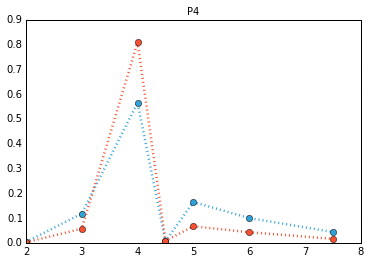

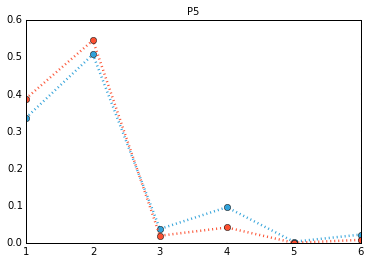

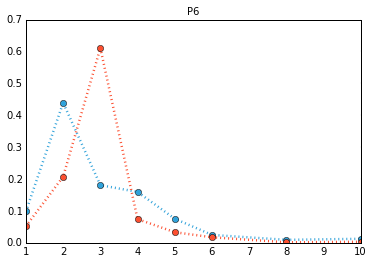

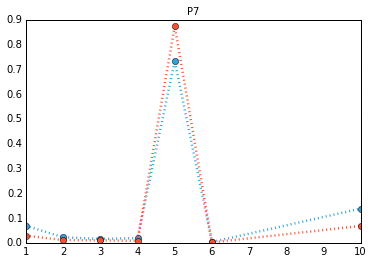

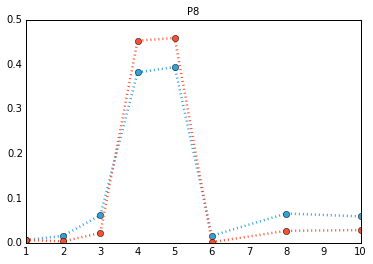

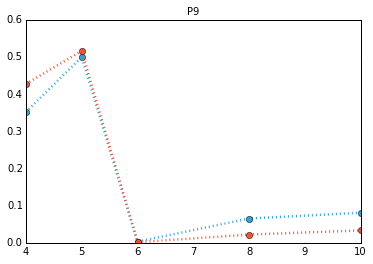

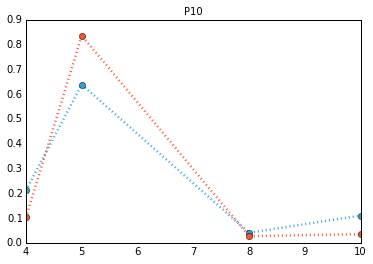

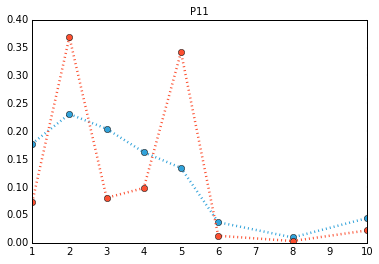

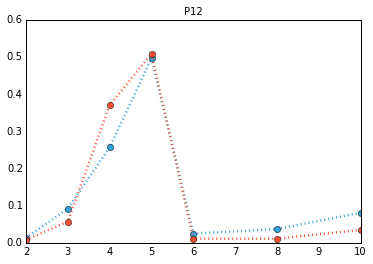

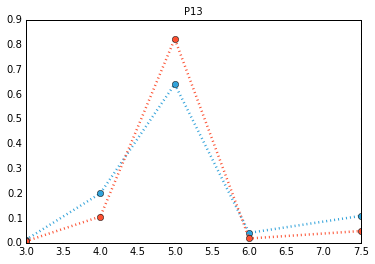

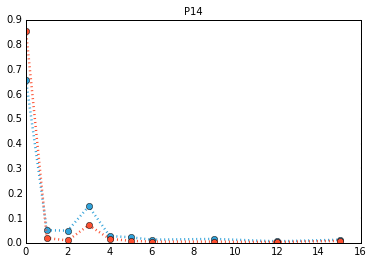

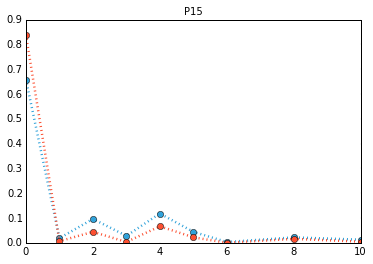

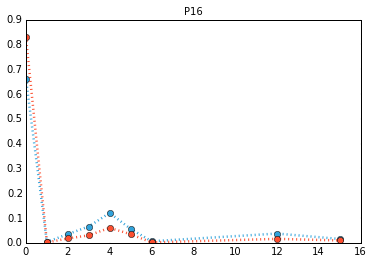

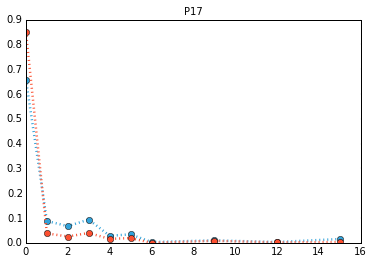

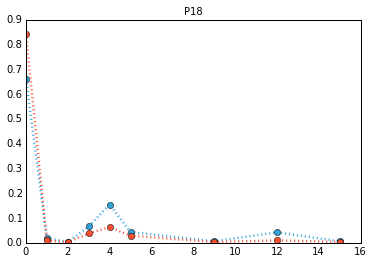

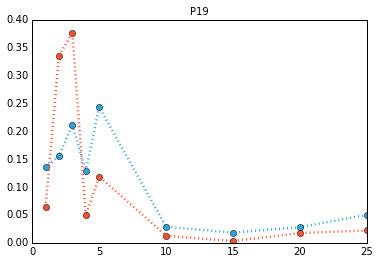

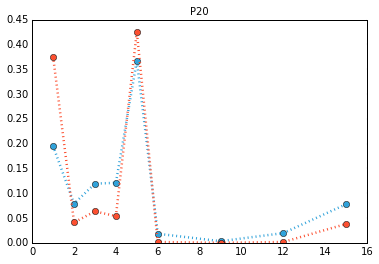

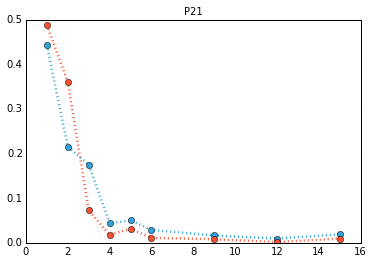

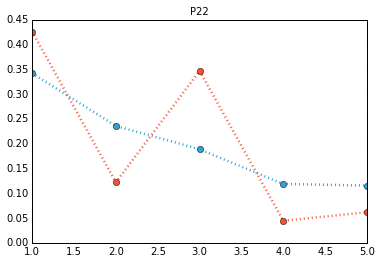

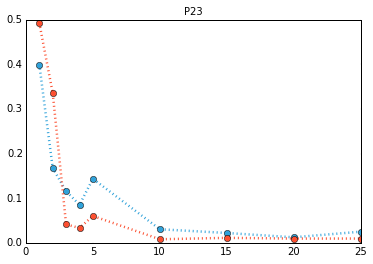

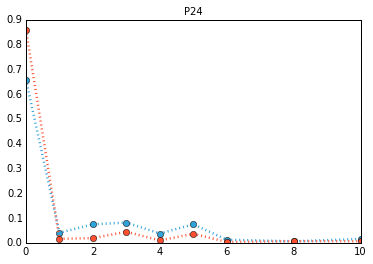

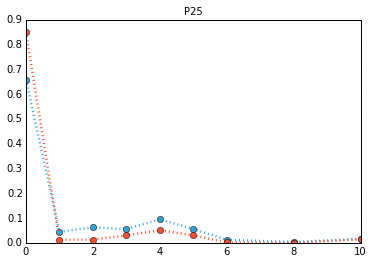

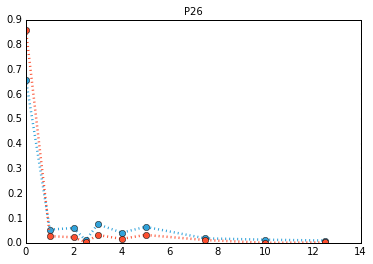

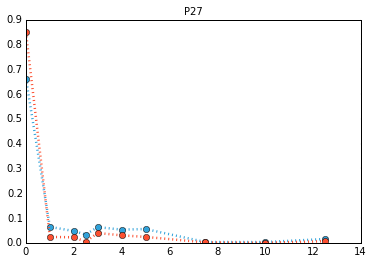

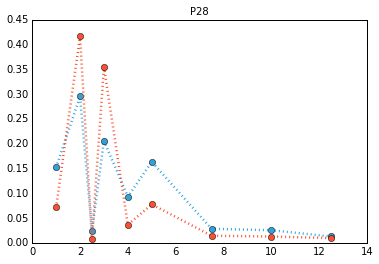

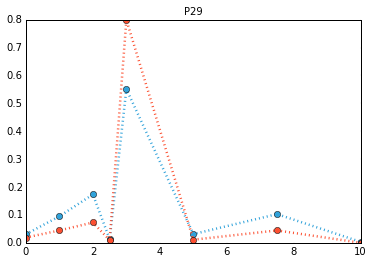

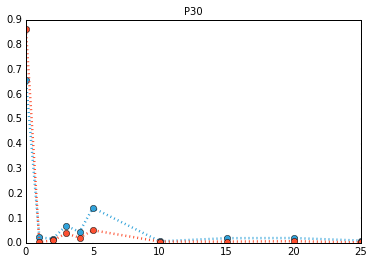

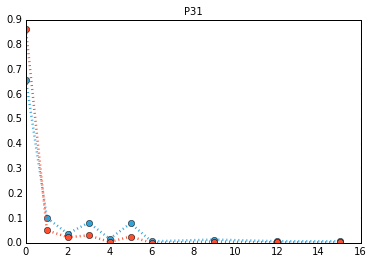

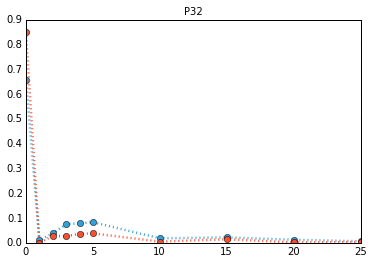

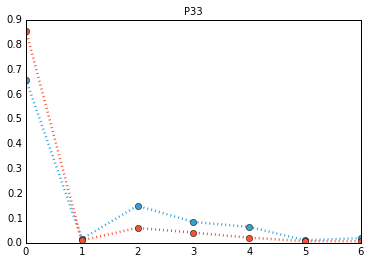

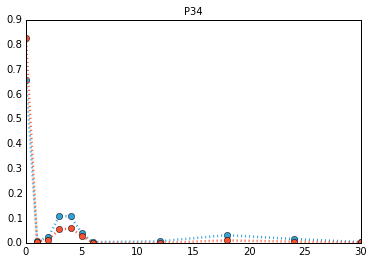

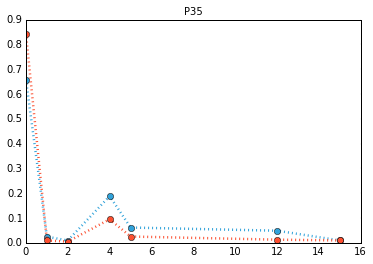

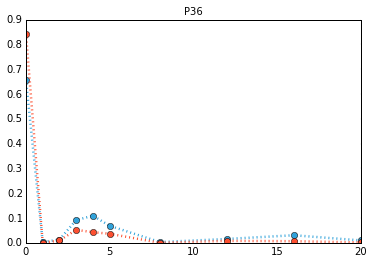

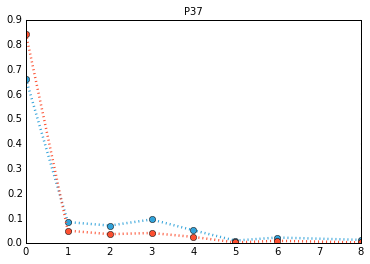

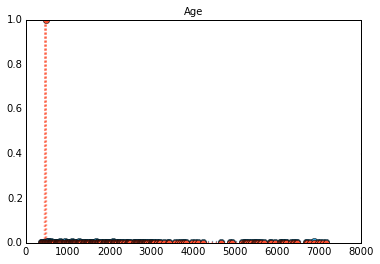

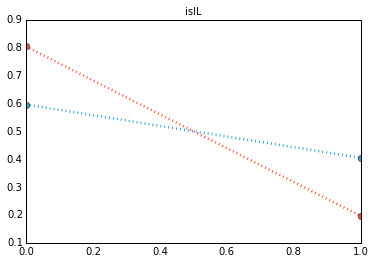

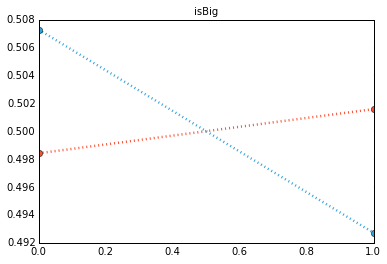

In [98]:
li_ = test['Age'].values==missing_cluster_ages[0]
group = test[li_]
for col in cols:
    plt.plot(uhistdict[col][0],uhistdict[col][1],':o')
    x,y = uniquehist(group[col].values, uhistdict[col][0])
    y = y/sum(y)
    plt.plot(x,y,':o')
    plt.title(col)
    plt.show()

In [108]:
li_ = test['Age'].values==3426
group = test[li_]
group_centre = {}
for col in test.columns:
    if col=='Id':
        continue
    x,y = uniquehist(group[col].values, uhistdict[col][0])
    y = y/sum(y)
    idx = np.argmax(y - uhistdict[col][1])
    group_centre[col] = uhistdict[col][0][idx]
li_centre = np.ones(len(group),dtype=bool)
for col in test.columns:
    if col=='Id':
        continue
    li_centre = li_centre * (group[col].values == group_centre[col])
print(sum(li_centre))
print(group[li_centre])
T = group[li_centre][0:1][ccols].as_matrix()
T_xor = np.any(np.concatenate((np.expand_dims(np.all(T==0,1),1), np.expand_dims(np.all(T!=0,1),1)),1),1)
print(T_xor)
print(group[li_centre]['Id'].values)

xor_col_vals = {col: group_centre[col] for col in ccols}
print(xor_col_vals)

6
          Id   Open Date      City  City Group Type  P1   P2   P3   P4  P5  \
15959  15959  08/15/2005  İstanbul  Big Cities   IL   9  7.5  4.5  7.5   4   
25847  25847  08/15/2005  İstanbul  Big Cities   IL   9  7.5  4.5  7.5   4   
72794  72794  08/15/2005  İstanbul  Big Cities   IL   9  7.5  4.5  7.5   4   
73770  73770  08/15/2005  İstanbul  Big Cities   IL   9  7.5  4.5  7.5   4   
75640  75640  08/15/2005  İstanbul  Big Cities   IL   9  7.5  4.5  7.5   4   
76046  76046  08/15/2005  İstanbul  Big Cities   IL   9  7.5  4.5  7.5   4   

       ...    P31  P32  P33  P34  P35  P36  P37   Age  isIL  isBig  
15959  ...     12   15    4   18   15   16    0  3426  True   True  
25847  ...     12   15    4   18   15   16    0  3426  True   True  
72794  ...     12   15    4   18   15   16    0  3426  True   True  
73770  ...     12   15    4   18   15   16    0  3426  True   True  
75640  ...     12   15    4   18   15   16    0  3426  True   True  
76046  ...     12   15    4   18   15

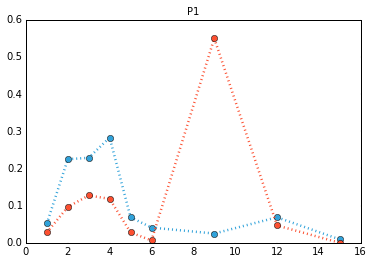

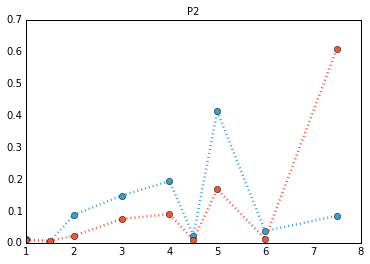

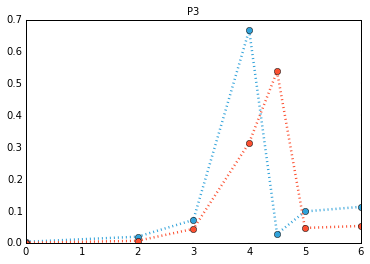

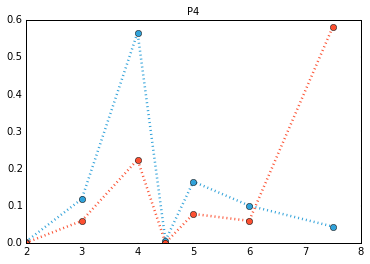

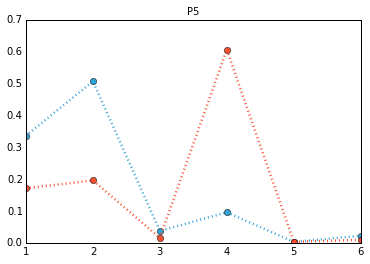

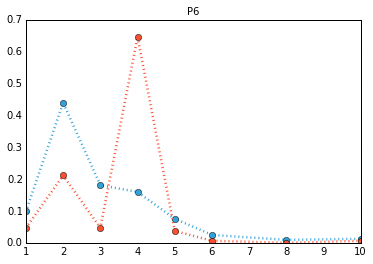

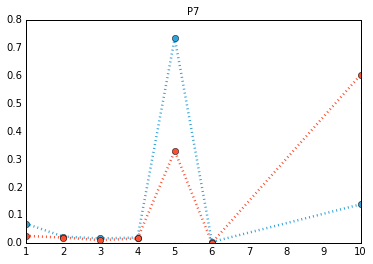

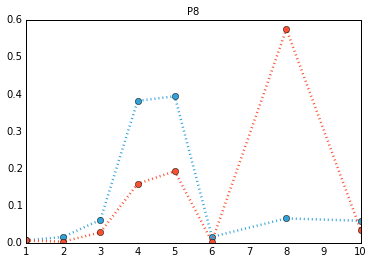

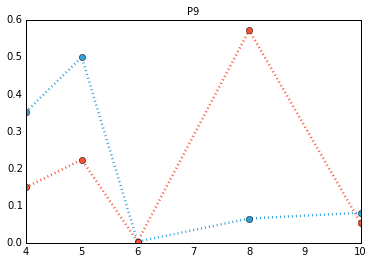

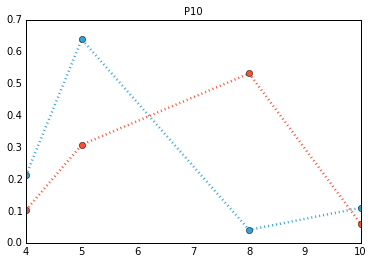

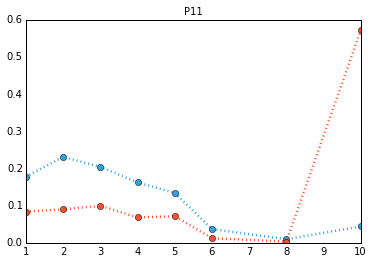

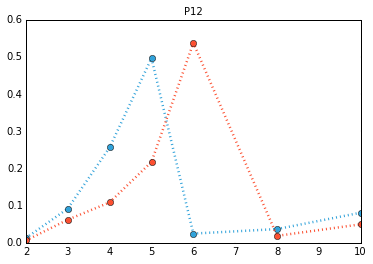

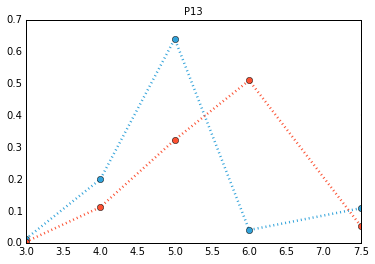

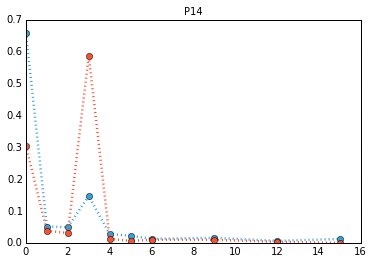

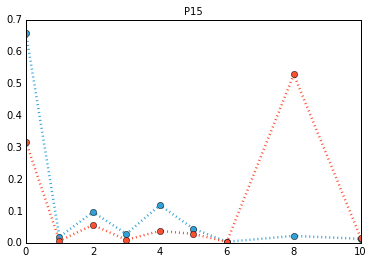

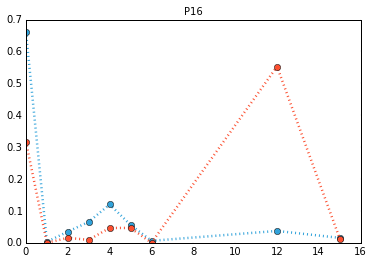

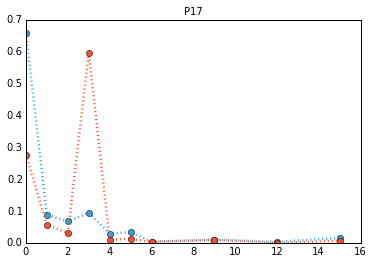

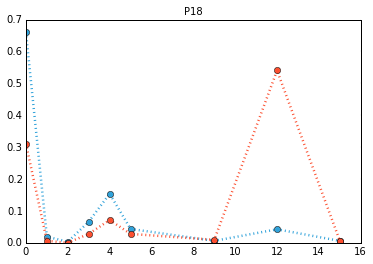

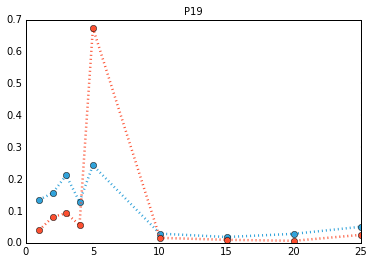

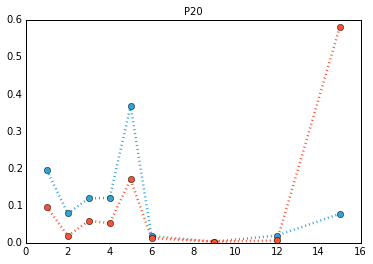

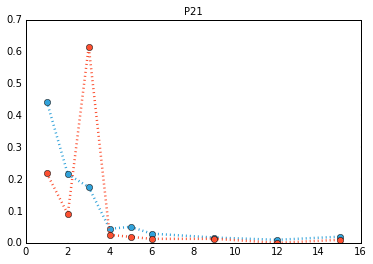

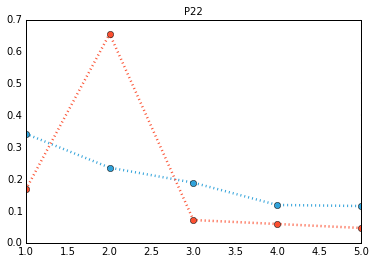

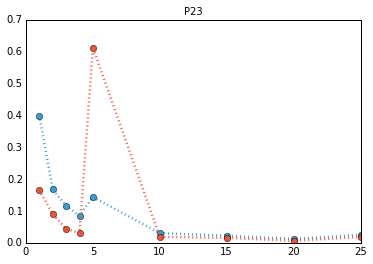

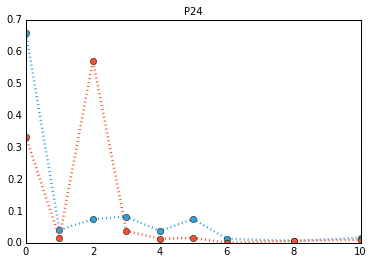

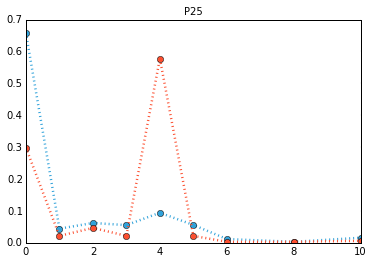

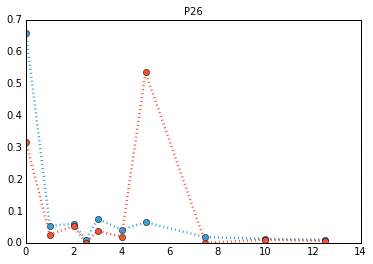

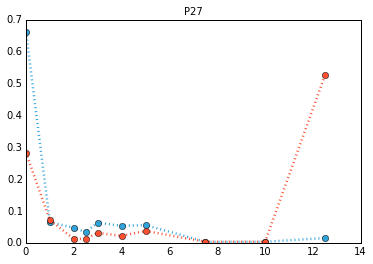

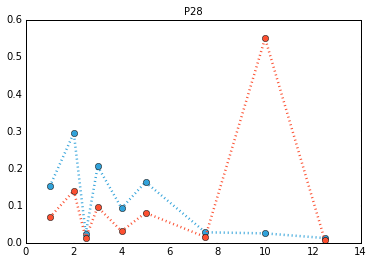

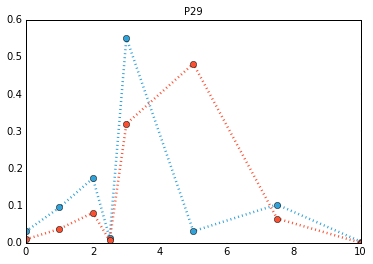

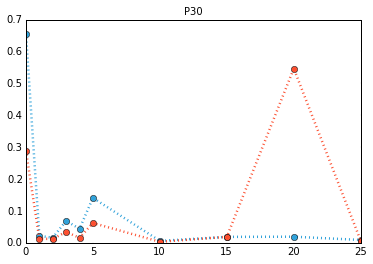

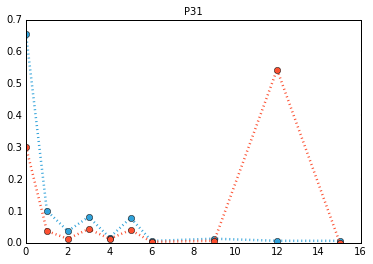

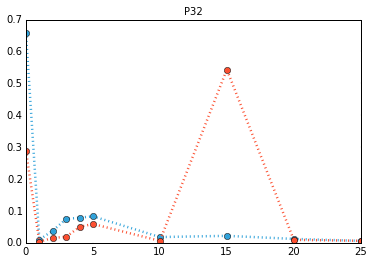

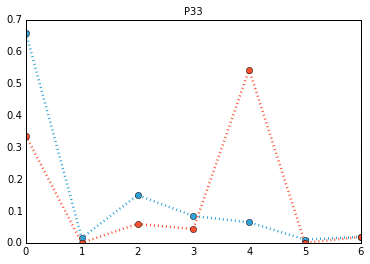

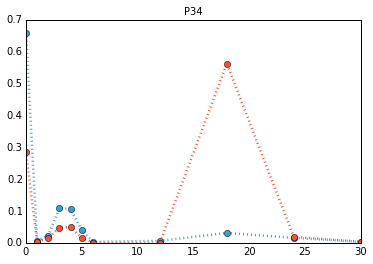

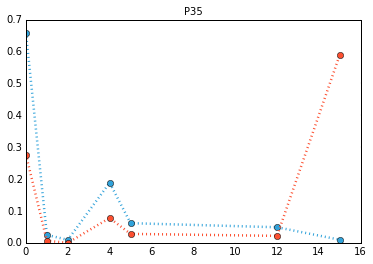

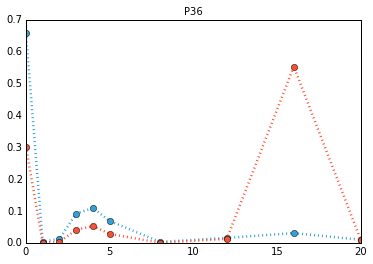

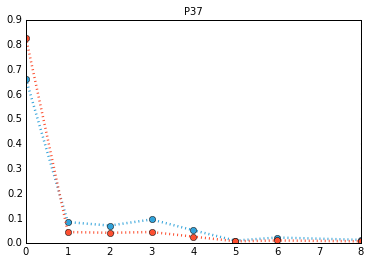

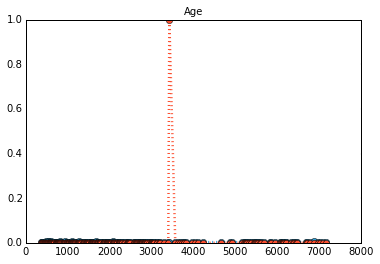

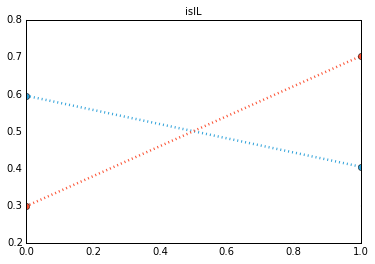

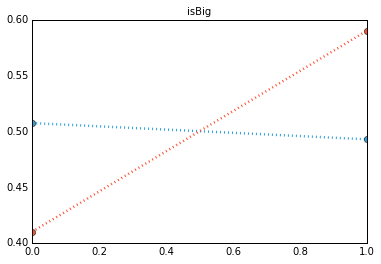

In [102]:
li_ = test['Age'].values==3426
group = test[li_]
for col in cols:
    plt.plot(uhistdict[col][0],uhistdict[col][1],':o')
    x,y = uniquehist(group[col].values, uhistdict[col][0])
    y = y/sum(y)
    plt.plot(x,y,':o')
    plt.title(col)
    plt.show()

In [109]:
li_ = test['Age'].values==754
group = test[li_]
group_centre = {}
for col in test.columns:
    if col=='Id':
        continue
    x,y = uniquehist(group[col].values, uhistdict[col][0])
    y = y/sum(y)
    idx = np.argmax(y - uhistdict[col][1])
    group_centre[col] = uhistdict[col][0][idx]
li_centre = np.ones(len(group),dtype=bool)
for col in test.columns:
    if col=='Id':
        continue
    li_centre = li_centre * (group[col].values == group_centre[col])
print(sum(li_centre))
print(group[li_centre])
T = group[li_centre][0:1][ccols].as_matrix()
T_xor = np.any(np.concatenate((np.expand_dims(np.all(T==0,1),1), np.expand_dims(np.all(T!=0,1),1)),1),1)
print(T_xor)
print(group[li_centre]['Id'].values)

xor_col_vals = {col: group_centre[col] for col in ccols}
print(xor_col_vals)

1
        Id   Open Date      City City Group Type  P1  P2  P3  P4  P5  ...    \
7350  7350  12/08/2012  Kırşehir      Other   IL   2   3   4   4   2  ...     

      P31  P32  P33  P34  P35  P36  P37  Age  isIL  isBig  
7350    2    3    2    4    2    1    1  754  True  False  

[1 rows x 45 columns]
[False]
[7350]
{'P36': 1, 'P24': 2, 'P15': 4, 'P31': 2, 'P30': 5, 'P16': 0, 'P26': 1.0, 'P35': 2, 'P37': 1, 'P33': 2, 'P32': 3, 'P17': 4, 'P27': 0.0, 'P14': 2, 'P34': 4, 'P18': 1, 'P25': 1}


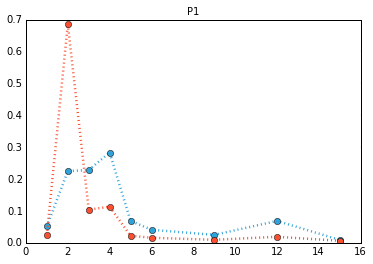

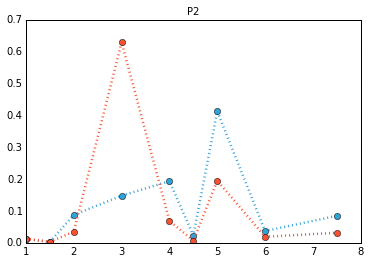

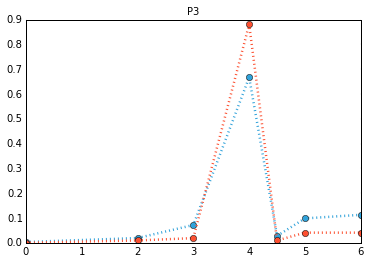

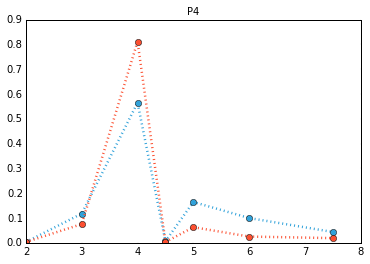

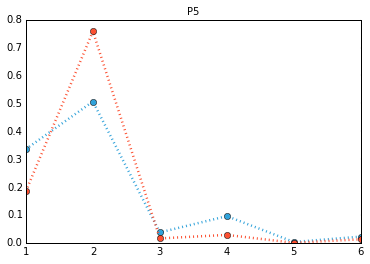

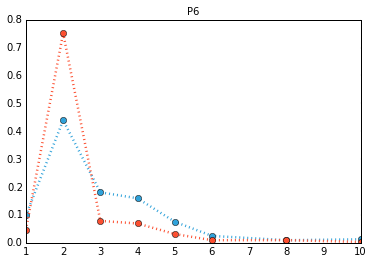

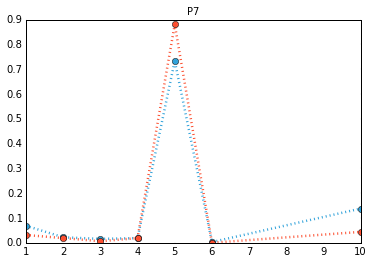

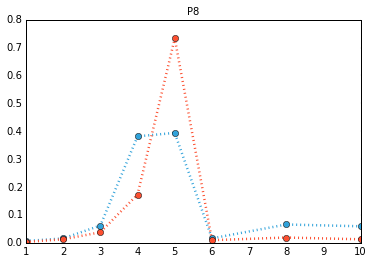

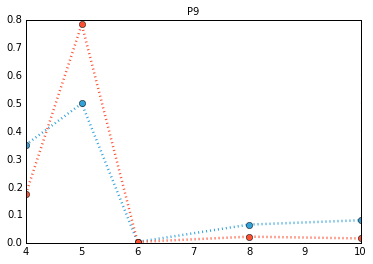

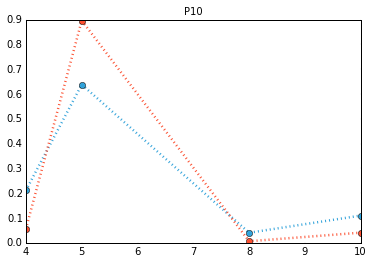

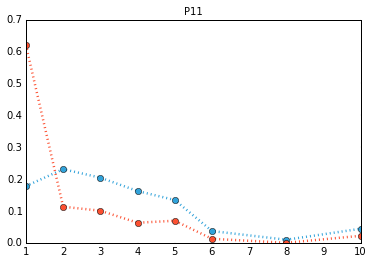

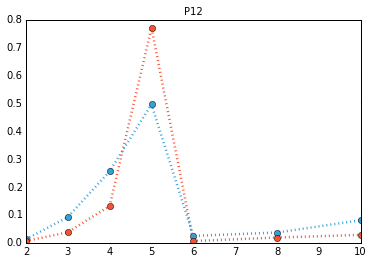

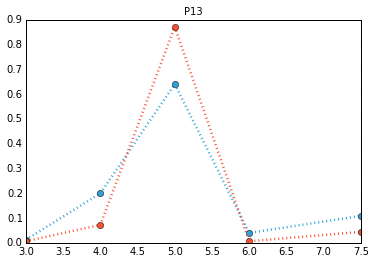

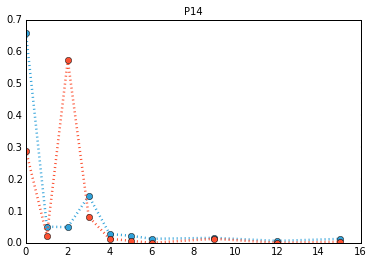

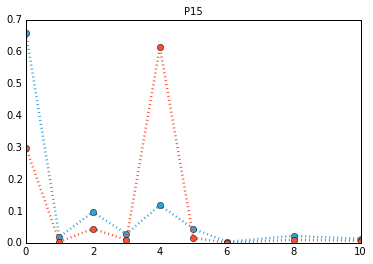

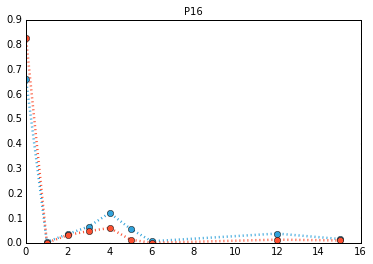

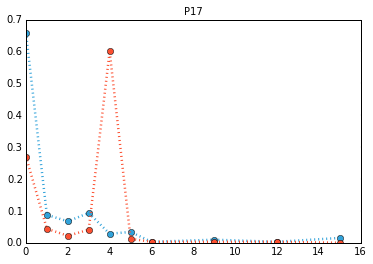

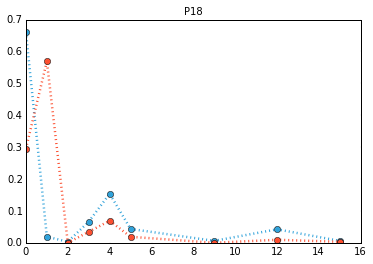

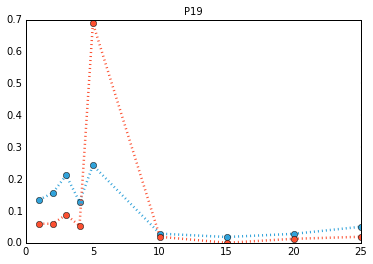

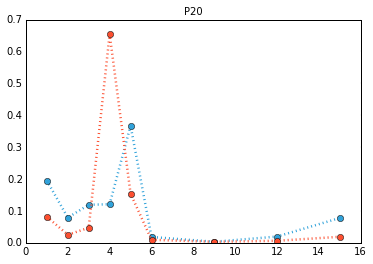

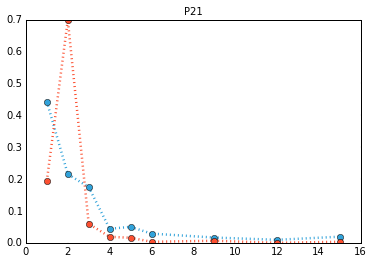

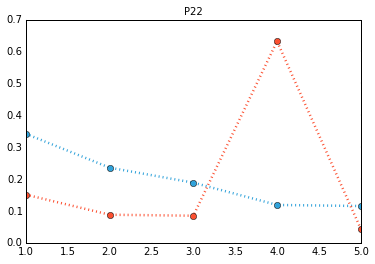

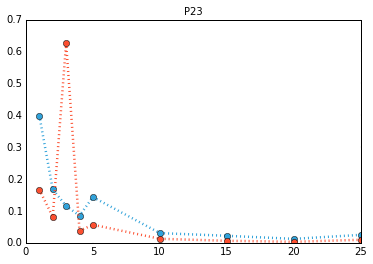

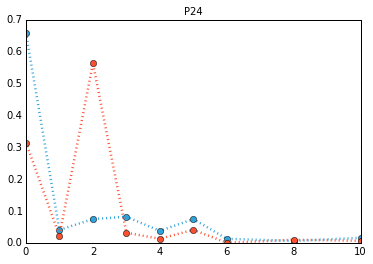

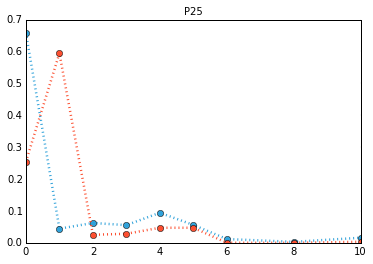

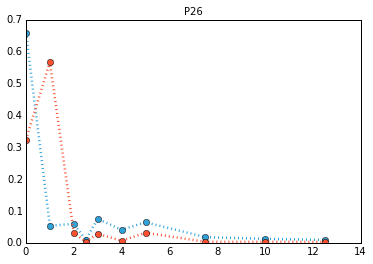

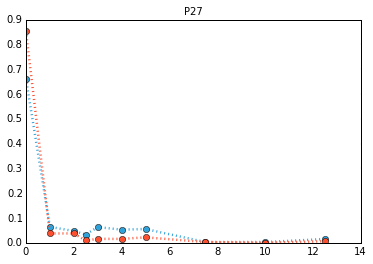

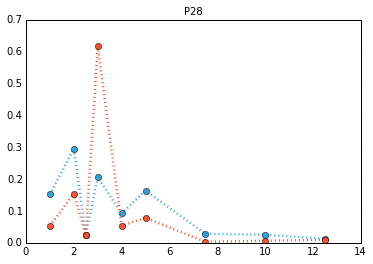

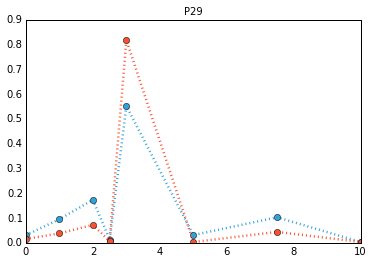

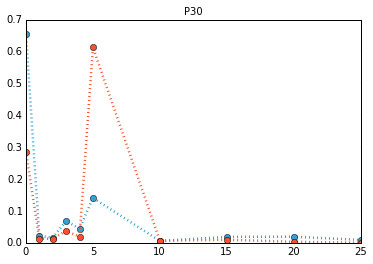

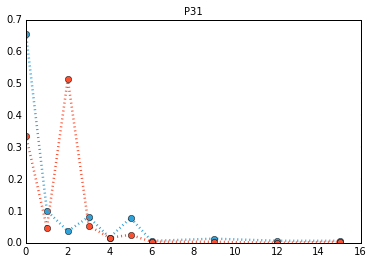

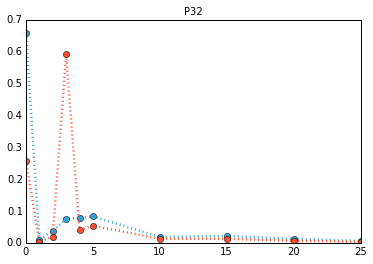

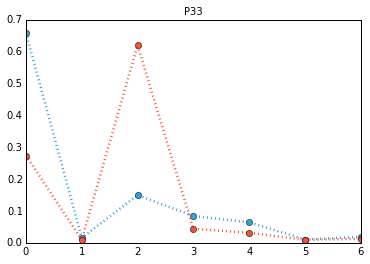

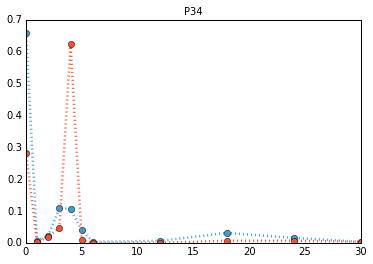

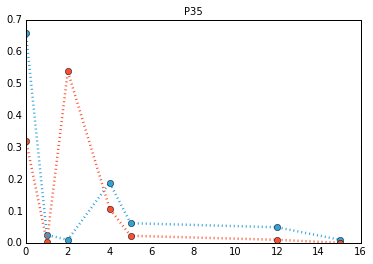

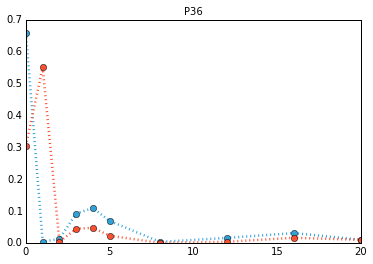

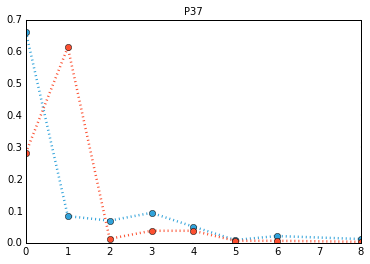

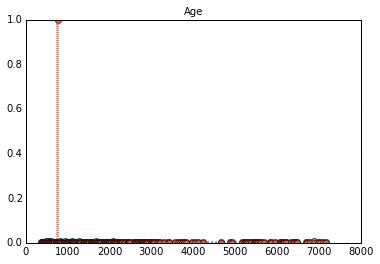

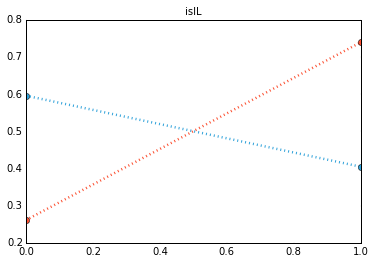

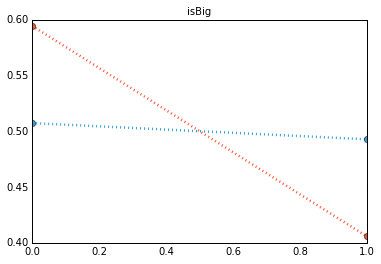

In [110]:
li_ = test['Age'].values==754
group = test[li_]
for col in cols:
    plt.plot(uhistdict[col][0],uhistdict[col][1],':o')
    x,y = uniquehist(group[col].values, uhistdict[col][0])
    y = y/sum(y)
    plt.plot(x,y,':o')
    plt.title(col)
    plt.show()